In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout


In [0]:
print(tf.__version__)

1.15.0


In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
X_train.max()

255

In [0]:
X_train = X_train/255
X_test = X_test/255


In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test.shape

(10000, 32, 32, 3)

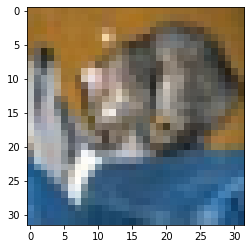

In [0]:
plt.imshow(X_test[0])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

**Build CNN Model**

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))


model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 206s 4ms/sample - loss: 1.4064 - sparse_categorical_accuracy: 0.4957 - val_loss: 1.0905 - val_sparse_categorical_accuracy: 0.6096
Epoch 2/10
50000/50000 [==============================] - 205s 4ms/sample - loss: 1.0814 - sparse_categorical_accuracy: 0.6170 - val_loss: 0.9849 - val_sparse_categorical_accuracy: 0.6509
Epoch 3/10
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.9578 - sparse_categorical_accuracy: 0.6629 - val_loss: 0.9721 - val_sparse_categorical_accuracy: 0.6568
Epoch 4/10
50000/50000 [==============================] - 205s 4ms/sample - loss: 0.8706 - sparse_categorical_accuracy: 0.6926 - val_loss: 0.8953 - val_sparse_categorical_accuracy: 0.6810
Epoch 5/10
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.8010 - sparse_categorical_accuracy: 0.7157 - val_loss: 0.8769 - val_sparse_categorical_accuracy: 0.6903
Epoch 6/10

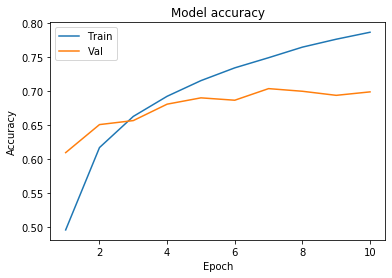

In [0]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

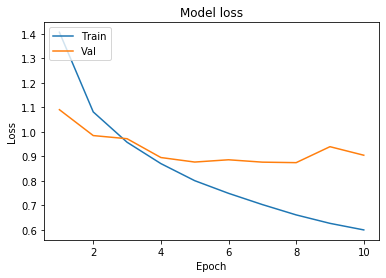

In [0]:
# Plot training & validation loss values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix   # Install mlxtend
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [0]:
mat

array([[696,  26,  38,  22,  23,   3,  20,  13,  77,  82],
       [ 11, 823,   7,   6,   4,   0,   9,   1,  21, 118],
       [ 67,   5, 493,  76, 122,  63,  80,  48,  17,  29],
       [ 20,  13,  47, 544, 109, 118,  68,  38,   6,  37],
       [ 16,   6,  45,  60, 680,  22,  64,  88,  13,   6],
       [  8,   7,  44, 243,  61, 499,  36,  76,   7,  19],
       [  4,   6,  32,  53,  58,  22, 801,   8,   7,   9],
       [ 10,   5,  24,  45,  50,  35,   4, 794,   3,  30],
       [ 40,  46,   7,  24,   9,   2,   3,   5, 810,  54],
       [ 25,  67,   3,  13,   3,   4,   1,  10,  23, 851]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb839d1ba58>)

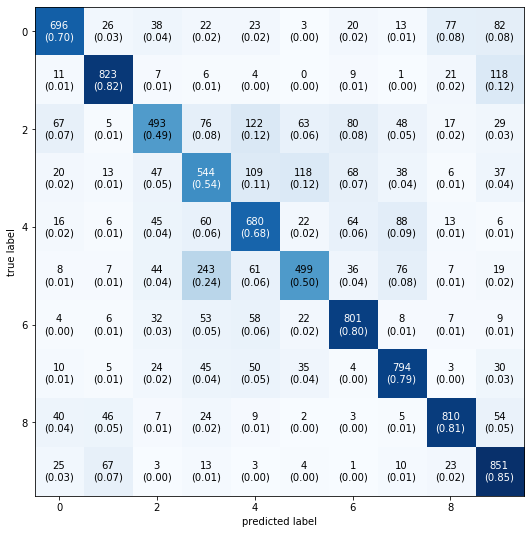

In [0]:
plot_confusion_matrix(mat,figsize=(9,9), show_normed=True)


**Great job Shivan!**